In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import platform

system = platform.system()
if system == "Linux":
    plt.rcParams['font.sans-serif'] = ["Noto Sans CJK JP"]
elif system == "Darwin":
    plt.rcParams['font.sans-serif'] = ["Kaiti SC"]
plt.rcParams['axes.unicode_minus'] = False

sns.set_style()


Bad key "text.kerning_factor" on line 4 in
/Users/magu/anaconda3/envs/OpenCV37/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


#### 非线性支持向量机

* ###### 非线性支持向量机的神奇之处在于，它可以帮助我们把不同形状的数据分开，像拼图一样。

* ###### 有时，我们不能仅仅用一条直线分开这些数据，所以我们需要一些特殊的技巧，这就是非线性SVM的用武之地。

##### 非线性SVM在很多情况下都非常有用，比如：

* ###### 当数据不是线性分布的，也就是说，不能只用一条直线把它们分开。
* ###### 当我们需要解决更复杂的问题，如图像识别或自然语言处理，这些问题通常不适合线性方法。
* ###### 当我们希望用一种更复杂的方式来分隔数据，以获取更好的结果。
* ###### 另外，非线性SVM的数学公式比较复杂，但我们可以简化为：它是一种方法，可以将数据映射到一个不同的空间，然后在那个空间中使用线性SVM。这个映射是通过一个叫做核函数来完成的。这个核函数通常表示为，它将原始数据和映射到一个新的空间。

##### 下面是一个使用非线性SVM的Python案例，以帮助理解。

* ##### 我们将使用支持向量机库svm中的SVC类，并使用径向基函数（RBF）核。

In [2]:
data = pd.read_csv("titanic_features_table.csv")
data.head()

,年龄,兄弟姐妹/配偶的个数,父母/小孩个数,票价,1等舱,2等舱,3等舱,登船港口为空,登船为S港,登船为Q港,登船为nan港,女性,男性,index,是否生还
0,22.0,1,0,7.2500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0
1,38.0,1,0,71.2833,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1,1
2,26.0,0,0,7.9250,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,2,1
3,35.0,1,0,53.1000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3,1
4,35.0,0,0,8.0500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,4,0


In [3]:
data.columns

Index(['年龄', '兄弟姐妹/配偶的个数', '父母/小孩个数', '票价', '1等舱', '2等舱', '3等舱', '登船港口为空',
       '登船为S港', '登船为Q港', '登船为nan港', '女性', '男性', 'index', '是否生还'],
      dtype='object')

In [4]:
x = data[['年龄', '兄弟姐妹/配偶的个数', '父母/小孩个数', '票价', '1等舱', '2等舱', '3等舱', '登船港口为空',
       '登船为S港', '登船为Q港', '登船为nan港', '女性', '男性']]
y = data['是否生还']
x.shape,y.shape

((1309, 13), (1309,))

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm

x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.3)


In [6]:
class_weight_parameter={}
for yt in y_train:
    if yt in class_weight_parameter:
        class_weight_parameter[yt]+=1 
    else:
        class_weight_parameter.update({yt:1})
class_weight_parameter

{0: 565, 1: 351}

In [7]:
clf = svm.SVC(C=1.0
            ,kernel='linear' #  ‘poly’多项式核函数, ‘rbf’, ‘sigmoid’, ‘precomputed’ 都是非线性核函数
            ,gamma="auto"#1/x.shape[-1]
            ,tol=1e-3
            ,class_weight=class_weight_parameter
            ,cache_size = 400 #指定内核缓存的大小（以MB为单位
            #,coef0 =0.0 #浮点数，默认=0.0 核函数中的独立项。它只在' poly '和' sigmoid '中有意义。
            # ,probability=True
            ,verbose= True
            ,max_iter=-1
            ,decision_function_shape='ovr'
             )



In [8]:
clf.fit(x_train, y_train)

[LibSVM]

SVC(cache_size=400, class_weight={0: 565, 1: 351}, gamma='auto',
    kernel='linear', verbose=True)

In [9]:
prediction_y_svc = clf.predict(x_test)
accuracy_score(y_test,prediction_y_svc)

0.8524173027989822

### 第二种方法实现线性支持向量机

In [10]:
clf = svm.LinearSVC(
    penalty='l2'
    , loss='hinge'#'squared_hinge'
    ,dual=True
    , tol=0.0001
    , C=1.0
    , multi_class='ovr'
    , fit_intercept=True
    , intercept_scaling=1
    , class_weight=None#class_weight_parameter
    , verbose=0
    , random_state=42
    , max_iter=100000)
clf.fit(x_train,y_train)
prediction_y_Lsvc = clf.predict(x_test)
accuracy_score(y_test,prediction_y_Lsvc)


0.8447837150127226

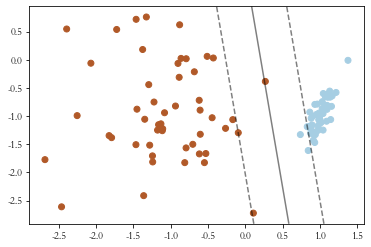

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm

# 生成一些随机数据
X, y = datasets.make_classification(n_samples=100, n_features=2, n_classes=2, n_clusters_per_class=1, n_redundant=0)

# 创建SVM模型
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

# 绘制数据点
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

# 绘制决策边界
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# 创建网格来评估模型
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 绘制决策边界和间隔
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
plt.show()